<a href="https://colab.research.google.com/github/ndhend/global_co2_emission/blob/main/vs2_global_co2_emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,country,1990,2005,2017,2021
42,China,2397.050,6263.06,10877.22,12466.32
202,United States,5085.900,5971.57,5107.39,4752.08
93,India,605.968,1210.75,2454.77,2648.78
158,Russia,2378.920,1733.95,1764.87,1942.54
102,Japan,1149.400,1276.86,1320.78,1084.69


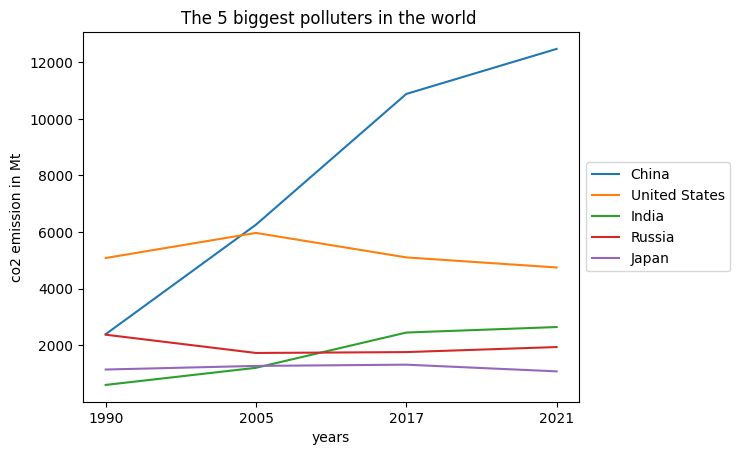

In [92]:
# Global Co2 emission
# graph 1: 5 biggest polluters
# graph2 : 3 biggest and 3 smallest polluters
# graph 3: 3 biggest and 3 smallest relative polluters > 5mt

# Graph 1: CO2 of the bigger countries

import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/ndhend/csv_data_winc/main/co2_emissions.csv'
df = pd.read_csv(url)
# name df
countries = df
# rename columns
countries.columns = ['country','1990', '2005', '2017', '2021']

#countries

# Take out the non-countries ("world" and "European Union")

countries = countries.loc[countries.country.str.contains("World") ==  False]
countries = countries.loc[countries.country.str.contains('European Union') ==  False]
countries


# The 5 biggest co2 producers
top5_countries = countries.sort_values(by=['2021'], ascending=False).head(5)
display(top5_countries)


fig, ax = plt.subplots()

years = top5_countries.columns[1:]
# years

for index, row in top5_countries.iterrows():
  plt.plot(years, row[1:], label=row[0])

plt.xlabel("years") # label for x-axis
plt.ylabel("co2 emission in Mt") # label for y-axis
plt.title("The 5 biggest polluters in the world ") # set title of plot

# place the legend box outside the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()





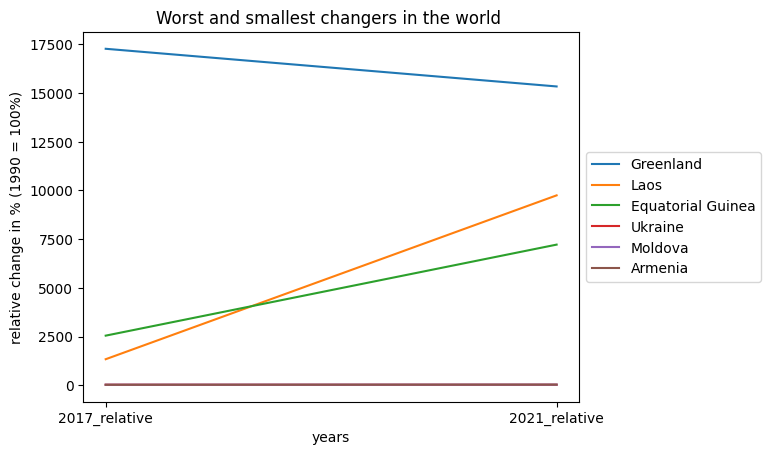

In [93]:
# graph2 : 3 biggest and 3 smallest polluters

import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/ndhend/csv_data_winc/main/co2_emissions.csv'
df = pd.read_csv(url)
# name df
countries = df
# rename columns
countries.columns = ['country','1990', '2005', '2017', '2021']

# countries

# Take out the non-countries ("world" and "European Union")
countries = countries.loc[(countries.country.str.contains("World") ==  False)]
countries = countries.loc[countries.country.str.contains('European Union') ==  False]
# countries

# 3 worst and best changers
# 1990 = 100%
# relative change 2005 => df["2005 relative"] = df["2005"] / df["1990"] * 100
# relative change 2017
# relative change 2021

countries["2005_relative"] = countries["2005"] / countries["1990"] * 100 # make new column in df
countries["2017_relative"] = countries["2017"] / countries["1990"] * 100
countries["2021_relative"] = countries["2021"] / countries["1990"] * 100
# countries


worst_changers= countries.nlargest(3, "2021_relative")
# worst_changers
best_changers = countries.nsmallest(3, "2021_relative")
# best_changers

worst_and_best_changers = pd.concat([worst_changers, best_changers], ignore_index=True)
# worst_and_best_changers

# graph 2: 3 worst and best changers

fig, ax = plt.subplots()

years = worst_and_best_changers.columns[6:]
# years

for index, row in worst_and_best_changers.iterrows():
  plt.plot(years, row[6:], label=row["country"])

plt.xlabel("years") # label for x-axis
plt.ylabel("relative change in % (1990 = 100%)") # label for y-axis
plt.title("Worst and smallest changers in the world ") # set title of plot

# place the legend box outside the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()













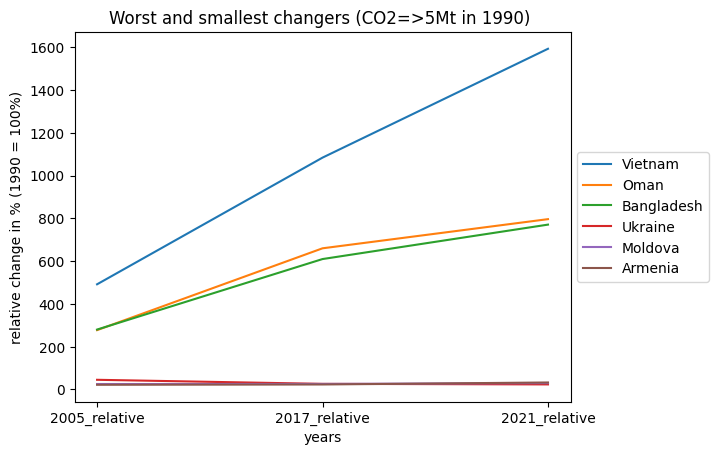

In [123]:
# graph3 : create the same chart for the top three and bottom three countries
# that had at least five Mt of CO2 emissions in 1990.

import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/ndhend/csv_data_winc/main/co2_emissions.csv'
df = pd.read_csv(url)
# name df
countries = df.copy()  # Create a copy of the DataFrame
# rename columns
countries.columns = ['country', '1990', '2005', '2017', '2021']

# Take out the non-countries ("world" and "European Union")
countries = countries.loc[~countries.country.str.contains("World")]
countries = countries.loc[~countries.country.str.contains('European Union')]

# Create a boolean mask for countries with emissions greater than or equal to 5 Mt in 1990
mask_5mt_or_more = countries['1990'] >= 5

# Apply the boolean mask to filter the rows and create a new DataFrame
countries_5mt_or_more = countries.loc[mask_5mt_or_more].copy()

# Calculate relative changes and use .loc to assign values
countries_5mt_or_more.loc[:, "2005_relative"] = countries_5mt_or_more["2005"] / countries_5mt_or_more["1990"] * 100
countries_5mt_or_more.loc[:, "2017_relative"] = countries_5mt_or_more["2017"] / countries_5mt_or_more["1990"] * 100
countries_5mt_or_more.loc[:, "2021_relative"] = countries_5mt_or_more["2021"] / countries_5mt_or_more["1990"] * 100

# Display the DataFrame
countries_5mt_or_more

# graph 2: 3 worst and best changers 1990 => 1990

worst_changers = countries_5mt_or_more.nlargest(3, "2021_relative")
best_changers = countries_5mt_or_more.nsmallest(3, "2021_relative")
# worst_changers
# best_changers

worst_and_best_changers = pd.concat([worst_changers, best_changers], ignore_index=True)
# worst_and_best_changers

# graph 2: 3 worst and best changers

fig, ax = plt.subplots()

years = worst_and_best_changers.columns[5:]
# years

for index, row in worst_and_best_changers.iterrows():
  plt.plot(years, row[5:], label=row["country"])

plt.xlabel("years") # label for x-axis
plt.ylabel("relative change in % (1990 = 100%)") # label for y-axis
plt.title("Worst and smallest changers (CO2=>5Mt in 1990) ") # set title of plot

# place the legend box outside the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()
